# Investing a dataset

This project investigates the 'Titanic' dataset to find out what factors affected the survival of a passenger. I have come up with the following questions upon looking at the dataset.

Question 1: Did the Passenger Class (Pclass) have an impact on the survival of a passenger i.e did the passengers of first class have better chance of survival than the passengers of other lower classes?

Question 2: Did the age of a passenger affect the survival of the passenger?

Question 3: Did the gender of a passenger impact the chance of his/her survival?

The following analysis and exploration is made to answer the above questions.

In [65]:
#importing necessary packages and modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division

In [66]:
#loading the data into a pandas dataframe from the csv file
titanic_df = pd.read_csv('titanic-data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Wrangling

Looking at the dataset it can be noticed that the 'Cabin' column has many missing values. As the analysis doesn't require investigating the 'Cabin' attribute and also as it has many missing values, the 'Cabin' column can be removed from the dataframe to reduce some memory. 

The 'Age' column also has missing values but all the missing values are already 'NaN' in the dataframe and this will not cause any problem in the analysis because 'NaN' will be treated as 0 by pandas while performing aggregate operations.

In [67]:
#dropping the column 'Cabin' from the dataframe
titanic_df.drop(['Cabin'],axis = 1,inplace = True)

In [68]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


To find out the number of passengers who survived and the passengers who did not survive, the data is grouped into two groups on the 'Survived' attribute. The count of each group gives the number of people in the respective group.

In [69]:
#grouping the data into two groups on the 'Survived' attribute and determining the number of people in each group
groupedby_Survived = titanic_df.groupby('Survived',as_index = False)
survival_count = groupedby_Survived.count()
print("Total number of passengers : "+str(titanic_df.shape[0]))
print("Number of passengers who survived : "+str(survival_count.loc[1,'PassengerId']))
print("Number of passengers who did not survive : "+str(survival_count.loc[0,'PassengerId']))

Total number of passengers : 891
Number of passengers who survived : 342
Number of passengers who did not survive : 549


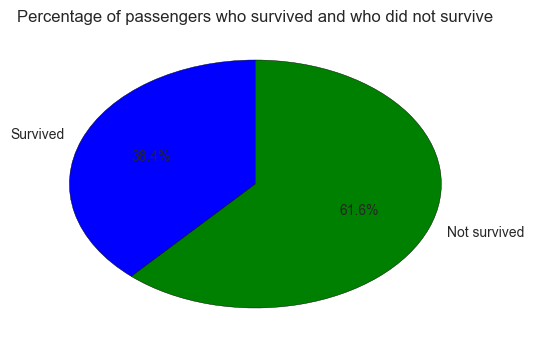

In [70]:
percentage_survived = (survival_count.loc[1,'PassengerId']/titanic_df.shape[0])*100
percentage_not_survived = (survival_count.loc[0,'PassengerId']/titanic_df.shape[0])*100
sizes = [percentage_survived,percentage_not_survived]
labels = ['Survived','Not survived']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
x = plt.title("Percentage of passengers who survived and who did not survive")

The above pie chart shows that out of all the passengers aboard the Titanic, only 38.4% of the passengers survived and the reamaining 61.6% of the passenngers did not survive.

## Analyzing the effect of passenger class on the chance of survival

To determine if the passenger class had an effect on the survival of a passenger, grouping the data on the 'Pclass' attribute and then investing the statistics of each group could provide an explanation. As there are three passenger classes, grouping the data on 'Pclass' attribute divides the entire data into three groups. Each group contains information about passengers who boarded that passenger class.

In [71]:
#grouping the data on the 'Pclass' attribute
groupedby_Pclass = titanic_df.groupby('Pclass',as_index = False)

In [72]:
def count_people(column):
    """
    This function takes in a series and returns the counts of total people,
    the number of people who survived and the number of people who did
    not survive
    """
    total = column.shape[0]
    survived = 0
    not_survived = 0
    for x in column:
        if x == 1:
            survived += 1
        else:
            not_survived += 1
    return total,survived,not_survived

In [73]:
#a list to store the percentage of survived people in each passenger class
survival_percentage = [0]*3

In [74]:
def display_stats():
    """
    This function uses the count_people function to determine the 
    statistics of each group (Pclass)
    """
    stats = groupedby_Pclass['Survived'].apply(count_people)
    for i in range(3):
        print("Passengers of class "+str(i+1))
        print("Number of people who boarded : " +str(stats[i][0]))
        print("Number of people who survived : " +str(stats[i][1]))
        print("Number of people who did not survive : " +str(stats[i][2]))
        survival_percentage[i] = (stats[i][1]/stats[i][0])*100
        print("Percentage of people who survived : "+str(survival_percentage[i]))
        print

In [75]:
display_stats()

Passengers of class 1
Number of people who boarded : 216
Number of people who survived : 136
Number of people who did not survive : 80
Percentage of people who survived : 62.962962963

Passengers of class 2
Number of people who boarded : 184
Number of people who survived : 87
Number of people who did not survive : 97
Percentage of people who survived : 47.2826086957

Passengers of class 3
Number of people who boarded : 491
Number of people who survived : 119
Number of people who did not survive : 372
Percentage of people who survived : 24.2362525458



The above statistics show that among the three passenger classes, the passengers belonging to the higher class had better chance of survival than the passengers of the lower classes. This could be because of several reasons. It could have happened because maybe the first class passengers had access to more exit points than the lower class passengers or maybe the first class passengers were evacuated before the other class' passengers.

In [76]:
def display_barPlot():
    """
    This function displays a bar plot where the bars represent the survival percentage
    of each class
    """
    bar_width = 0.5
    for i in range(3):
        class_bar = plt.bar(i-bar_width/2,survival_percentage[i],width = bar_width)
    locs = (0.0,1.0,2.0)
    plt.xticks(locs,(1,2,3))
    plt.xlabel("Passenger class")
    plt.ylabel("Survival percentage")
    plt.title("Survival percentage of each class")

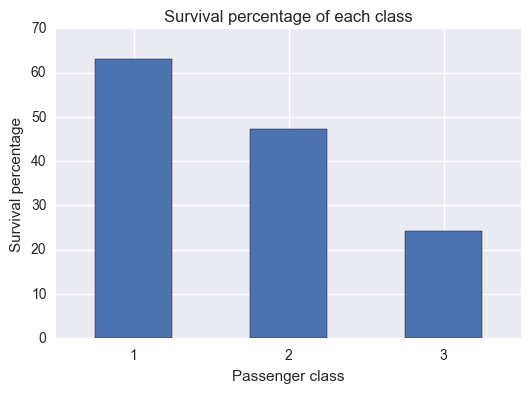

In [77]:
#displaying the bar plot
display_barPlot()

The above bar plot shows that about 62% of the passengers from first class survived, 48% of the passengers from second class survived and only 24% of the passengers from third class survived. This bar plot visualizes the fact that the passengers of higher class had better chance of survival than the passengers of lower classes.

## Analyzing the effect of age on the chance of survival

The following analysis is made to determine if the age of a passenger played any role in the passenger's survival. The data is already grouped into two groups based on the 'Survived' attribute. One group contains information about all the passengers who survived and the other group contains information about the passengers who did not survive. Investigating the ages of people of a particular group could provide insights into how age affected the survival of a passenger.

In [78]:
def compute_age_stats(age):
    """
    This function takes in the ages of passengers belonging to a particular group
    and computes the minimum age, maximum age and average age of the passengers
    of that group
    """
    min_age = age.min()
    max_age = age.max()
    mean_age = age.mean()
    std_age = age.std(ddof = 0)
    return min_age,max_age,mean_age,std_age

In [79]:
def display_age_stats():
    """
    This function uses the compute_age_stats function to display the
    age statistics of all the groups.
    """
    age_stats = groupedby_Survived['Age'].apply(compute_age_stats)
    print("The people who survived")
    print("The minimum age is "+str(age_stats[1][0]))
    print("The maximum age is "+str(age_stats[1][1]))
    print("The average age is "+str(age_stats[1][2]))
    print
    print("The people who did not survive")
    print("The minimum age is "+str(age_stats[0][0]))
    print("The maximum age is "+str(age_stats[0][1]))
    print("The average age is "+str(age_stats[0][2]))

In [80]:
display_age_stats()

The people who survived
The minimum age is 0.42
The maximum age is 80.0
The average age is 28.3436896552

The people who did not survive
The minimum age is 1.0
The maximum age is 74.0
The average age is 30.6261792453


From the above statistics it can be seen that the average age of the passengers who survived and the average age of the passengers who did not survive are close to each other. This could be because most of the passengers aboard the Titanic were aged between 20 and 40. This could indicate that age did not play a crucial role in the survival of a passenger.

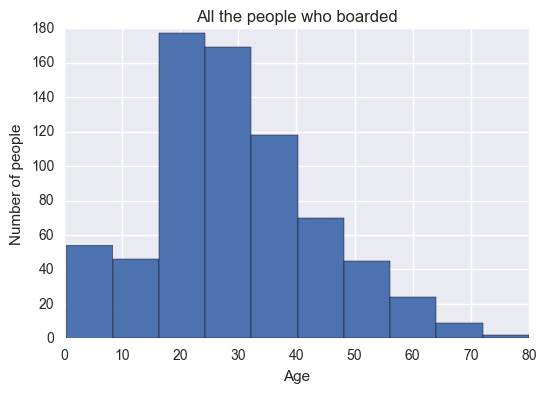

In [81]:
#displaying the histogram of ages of all the passengers aboard the Titanic
titanic_df['Age'].hist()
plt.xlabel("Age")
plt.ylabel("Number of people")
x = plt.title("All the people who boarded")

From the above histogram it can be seen that most of the passengers were between the ages 20 and 40. The minimum age of the passengers was less than one year and the maximum age of the passengers was 80. There were around 470 passengers whose age was between 20 and 40 and there were only about 75 passengers whose age was more than 50.

In [82]:
#extracting the two groups of passengers from the grouped data
survived_group = groupedby_Survived.get_group(1)
not_survived_group = groupedby_Survived.get_group(0)

In [83]:
def display_hist(age,group):
    """
    This function displays a histogram for the ages of passengers
    belonging to a particular group.
    """
    age.hist()
    plt.xlabel("Age")
    plt.ylabel("Number of people")
    plt.title(group)

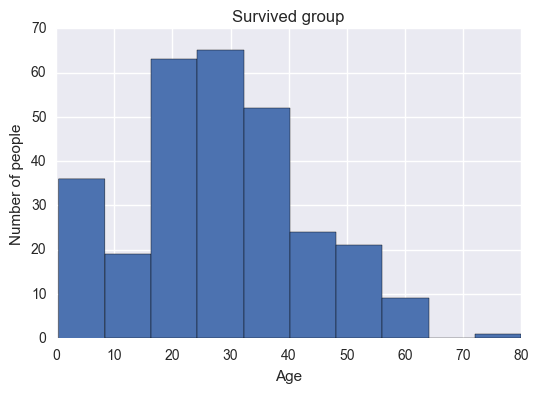

In [84]:
display_hist(survived_group['Age'],"Survived group")

The above histogram shows the ages of the people who survived. It can be seen that among the people that survived most of the people were between the ages 20 and 40. The minimum age of the passengers that survived was less than 1 and the maximum age of the passengers was 80. The total number of passengers that were below the age 10 were around 55 and about 35 of those passengers survived.

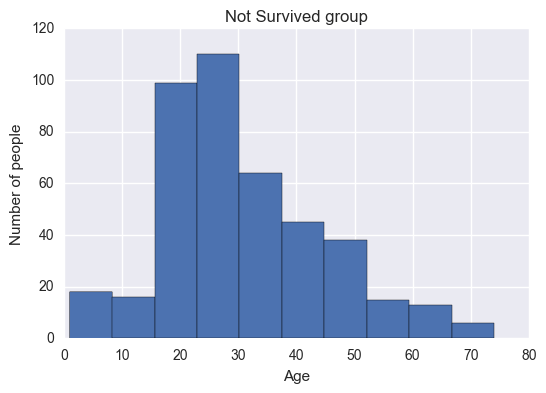

In [85]:
display_hist(not_survived_group['Age'],"Not Survived group")

The above histogram shows the ages of people who did not survive. This histogram also reveals that among all the passengers that did not survive most of them were between the ages 20 and 40. This is because of the fact that among all the passengers that were aboard the Titanic most of them were between the ages 20 and 40. The minimum age of the passengers that did not survive was 1 and the maximum age of the passengers that did not survive was 74.

Even though both the histograms look similar it can be seen that more passengers between the ages 0 and 10 belonged to the group that survived i.e children had better chance of survival. This could have happened because maybe children were evacuated first.

## Analyzing the effect of gender on survival

To determine if the gender of a passenger affected the passenger's survival, dividing the data into two groups according to the gender and then analyzing each group could help draw some conclusions. One group contains information about all the male passengers and the other group contains information about all the female passengers. Analyzing each group will help in determing the effect of gender on survival.

In [86]:
#grouping the data according to the 'Sex' attribute
groupedby_Sex = titanic_df.groupby('Sex',as_index = False)

In [87]:
def display_pie_chart():
    labels = ['Male', 'Female']
    sizes = [64.75, 35.25]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title("Distribution of males and females among the passengers")

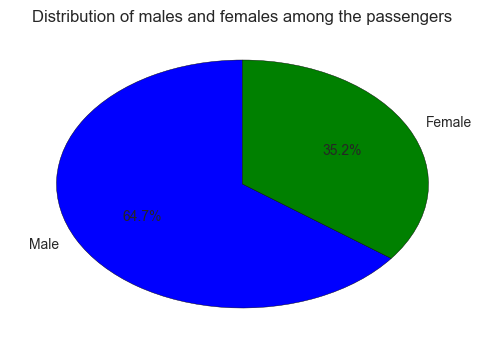

In [88]:
display_pie_chart()

The above pie chart shows that among all the passengers that were aboard the Titanic, 64.7% of the passengers were male and 35.2% of the passengers were female.

In [89]:
#a list that stores the percentage of people who survived from each group
survival_percentage_sex = [0]*2

In [90]:
def display_sex_stats():
    """
    This function displays the statistics about each group
    """
    sex_stats = groupedby_Sex['Survived'].apply(count_people)
    print("Male passengers")
    print("Number of males who boarded the ship : "+str(sex_stats[1][0]))
    print("Number of males who survived : "+str(sex_stats[1][1]))
    print("Number of males who did not survive : "+str(sex_stats[1][2]))
    survival_percentage_sex[0] = (sex_stats[1][1]/sex_stats[1][0])*100
    print("Percentage of males that survived :"+str(survival_percentage_sex[0]))
    print
    print("Female passengers")
    print("Number of females who boarded the ship : "+str(sex_stats[0][0]))
    print("Number of females who survived : "+str(sex_stats[0][1]))
    print("Number of females who did not survive : "+str(sex_stats[0][2]))
    survival_percentage_sex[1] = (sex_stats[0][1]/sex_stats[0][0])*100
    print("Percentage of females that survived :"+str(survival_percentage_sex[1]))

In [91]:
display_sex_stats()

Male passengers
Number of males who boarded the ship : 577
Number of males who survived : 109
Number of males who did not survive : 468
Percentage of males that survived :18.8908145581

Female passengers
Number of females who boarded the ship : 314
Number of females who survived : 233
Number of females who did not survive : 81
Percentage of females that survived :74.2038216561


The statistics show that among all the passengers who were aboard the Titanic, 65% of the passengers were **male**. Even though the majority of the passengers were male, the number of males that survived is very less than the number of females that survived. It can be seen that 74% of the female passengers survived whereas only 18.9% of the male passengers survived. These statistics could indicate that females were given priority during evacuation.

In [92]:
def display_sex_barPlot():
    """
    This function displays a bar plot where each bar represents the gender
    """
    bar_width = 0.5
    for i in range(2):
        gender_bar = plt.bar(i-bar_width/2,survival_percentage_sex[i],width = bar_width)
    locs = (0.0,1.0)
    plt.xticks(locs,("Male","Female"))
    plt.xlabel("Sex")
    plt.ylabel("Survival percentage")
    plt.title("Survival percentage of men and women")

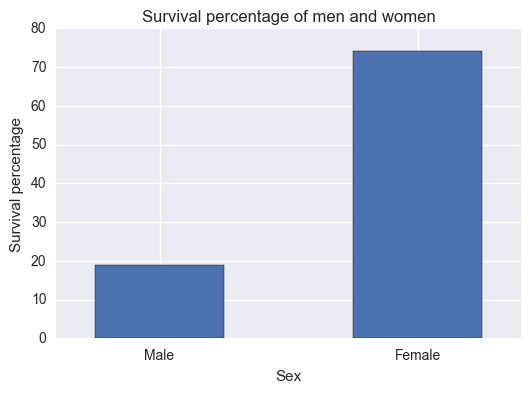

In [93]:
display_sex_barPlot()

From the above bar plot it can be inferred that very less percentage of the male passengers survived. Looking at the total passengers that were aboard the Titanic, it can be seen that majority of them were male. Even though there were more male passengers than the female passengers, only 19% of the male passengers survived which is very less when compared to the 74% of the female passengers that survived.

## Limitations

The dataset provides information about only 891 passengers out of the total 2222 passengers and crew that were aboard the Titanic. All the analysis was made only based on the information of these 891 passengers which is less than 50% of the actual total passengers. The correlations inferred based on this analysis could be different for the other passengers that were not included in the dataset. If the dataset included the information about all the passengers that were aboard the Titanic the correlations inferred could be more precise and accurate.

The information included in this dataset is only the information of the passengers. There were around 900 crew members on the Titanic and specific information about the crew members could help draw some interesting conclusions.

## Conclusion

The above analysis and results indicate that the **Passenger Class** and the **Gender** of the passenger affected the survival of the passenger. **Age** had very little effect on the survival of a passenger.
Passengers who were in first class had a better chance of survival than the passengers of lower classes and also the female passengers had better chance of survival than the male passengers. The age of the passenger did not have a considerable effect on the survival apart from the fact that children under the age 10 had a better chance of survival.

## References

https://pandas.pydata.org/pandas-docs/stable/api.html

http://matplotlib.org/1.2.1/api/pyplot_api.html